* This report will discuss about how to generate spectra out of sampled data using DFT Discrete fourier transform for aperiodic signal time domain. We use fast fourier transform algorithm to compute DFT which is done by fft and fftshift.We also analyse the effect of Windowed Fourier transform, and we estimate the $\omega$ and $\delta$ just from the spectra of the signal using some statistic and calculate estimated error.Finally we find DFT of a peculiar signal called $Chirp \ Signal$ whose frequency varies with time, so we use Short time fourier transform to analyse how frequency evolves with time.

# Introduction
* We explore digital fourier transform (DFT) with windowing. This is used to  make the signal square integrable, and more specifically, that the function goes sufficiently rapidly towards 0 , also to make infinitely long signal to a finite signal, since to take DFT we need finite aperiodic signal.

* Windowing a simple waveform like $cos(\omega t)$, causes its fourier transform to develop non-zero value at frequencies other than $\omega$. This is called *Spectral Leakage*. This can cause in some applications the stronger peak to smear the weaker contounter parts. So choosing proper windowing functions is essential. The windowing function we use is called **Hamming window** which is generally used in $narrow-band applications$.

In [1]:
import writefile_run as writefile_run

In [2]:
%%writefile_run ee16b031_assignment10.py

# load libraries and set plot parameters
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 9,6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

In [3]:
%%writefile_run ee16b031_assignment10.py -a

'''
Function to select different functions
Arguments:
 t -> vector of time values
 n -> encoded from 1 to 3 to select function
 w -> frequency of cos^3 function, which is by default 0.86
'''

def f(t,n,w=None,d=None):
    if(n == 1):
        return sin(sqrt(2)*t)
    elif(n==2):
        if(w is None):
            return pow(cos(0.86*t),3)
        elif(w!=None):
            return pow(cos(w*t),3)
    elif(n==3):
        return cos(16*(1.5+t/(2*pi))*t)
    elif(n==4):
        return t
    elif(n==5):
        if(w is None):
            return cos(0.86*t)
        elif(w!=None and d!=None):
            return cos(w*t+d)
    else:
        return sin(sqrt(2)*t)   

In [4]:
%%writefile_run ee16b031_assignment10.py -a

def window_fn(n,N):
    return (0.54+0.46*cos(2*pi*n/N))

In [5]:
%%writefile_run ee16b031_assignment10.py -a

'''
Function to find Discrete Fourier Transform
Arguments:
 low_lim,up_lim -> lower & upper limit for time vector
 no_points      -> Sampling rate
 f              -> function to compute DFT for
 n              -> mapped value for a function ranges(1,6)
 norm_factor    -> default none, only for Gaussian function
                   it is given as parameter
'''

def findFFT(low_lim,up_lim,no_points,n,window=True,wo=None,d=None,eps=0):
    t = linspace(low_lim,up_lim,no_points+1)[:-1]
    dt=t[1]-t[0]
    fmax=1/dt
    N = no_points
    y = f(t,n,wo,d)+eps*randn(len(t))
    
    if(window):
        n1=arange(N)
        wnd=fftshift(window_fn(n1,N))
        y=y*wnd
        
    y[0]=0        # the sample corresponding to -tmax should be set zeroo
    y=fftshift(y) # make y start with y(t=0)
    Y=fftshift(fft(y))/N

    w = linspace(-pi*fmax,pi*fmax,N+1)[:-1]        
    return t,Y,w

In [6]:
%%writefile_run ee16b031_assignment10.py -a

'''
Function to plot Magnitude and Phase spectrum for given function
Arguments:
 t              -> time vector
 Y              -> DFT computed
 w              -> frequency vector
 Xlims,Ylims    -> limits for x&y axis for spectrum
 plot_title,fig_no -> title of plot and figure no
'''

def plot_FFT(t,Y,w,Xlims,plot_title,fig_no,dotted=False,Ylims=None):
    
    figure()
    subplot(2,1,1)
    
    if(dotted):
        plot(w,abs(Y),'b',w,abs(Y),'bo',lw=2)
    else:
        plot(w,abs(Y),'b',lw=2)

    xlim(Xlims)
        
    ylabel(r"$|Y(\omega)| \to$")
    title(plot_title)
    grid(True)
    
    ax = subplot(2,1,2)
    ii=where(abs(Y)>0.005)
    plot(w[ii],angle(Y[ii]),'go',lw=2)

    if(Ylims!=None):
        ylim(Ylims)
    
    xlim(Xlims)
    ylabel(r"$\angle Y(j\omega) \to$")
    xlabel(r"$\omega \to$")
    grid(True)
    savefig("fig10-"+fig_no+".png")
    show()

* Working all the examples given using both windowed Fourier transform and without windowing and analyse the effect.

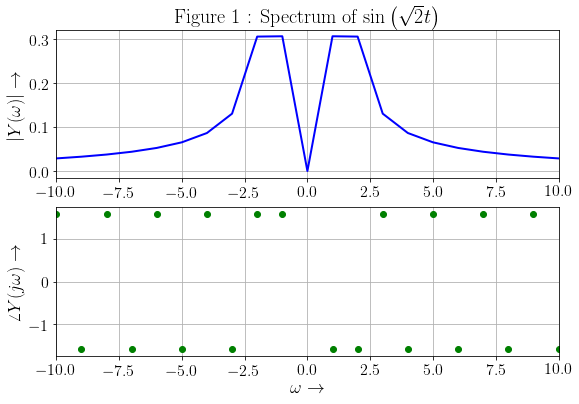

In [7]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-pi,pi,64,1,False)
Xlims = [-10,10]
title_plot = r"Figure 1 : Spectrum of $\sin\left(\sqrt{2}t\right)$"
plot_FFT(t,Y,w,Xlims,title_plot,"1")

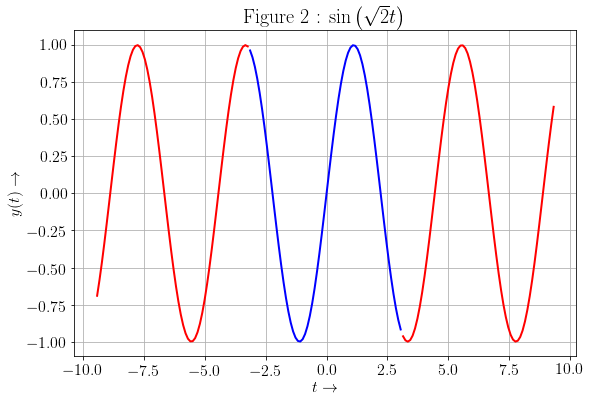

In [8]:
%%writefile_run ee16b031_assignment10.py -a

t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]

figure(2)
plot(t1,f(t1,1),'b',lw=2)
plot(t2,f(t2,1),'r',lw=2)
plot(t3,f(t3,1),'r',lw=2)
ylabel(r"$y(t) \to$",size=16)
xlabel(r"$t \to$",size=16)
title(r"Figure 2 : $\sin\left(\sqrt{2}t\right)$")
grid(True)
savefig("fig10-2.png")
show()

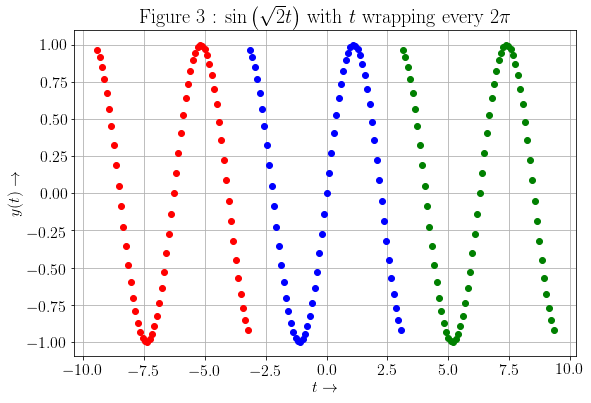

In [9]:
%%writefile_run ee16b031_assignment10.py -a

t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
y=f(t1,1)

figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'go',lw=2)
ylabel(r"$y(t) \to$",size=16)
xlabel(r"$t \to$",size=16)
title(r"Figure 3 : $\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
grid(True)
savefig("fig10-3.png")
show()

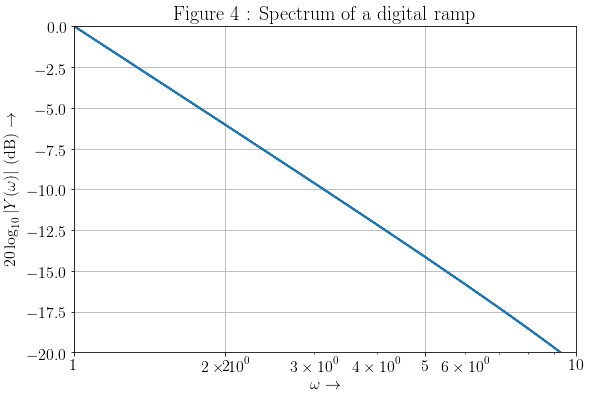

In [10]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-pi,pi,64,4,False)

figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
xticks([1,2,5,10],["1","2","5","10"],size=16)
ylabel(r"$20\log_{10}|Y(\omega)|$ (dB) $\to$ ",size=16)
title(r"Figure 4 : Spectrum of a digital ramp")
xlabel(r"$\omega \to$",size=16)
grid(True)
savefig("fig10-4.png")
show()

## Analysing the effect of Windowing the signal: 

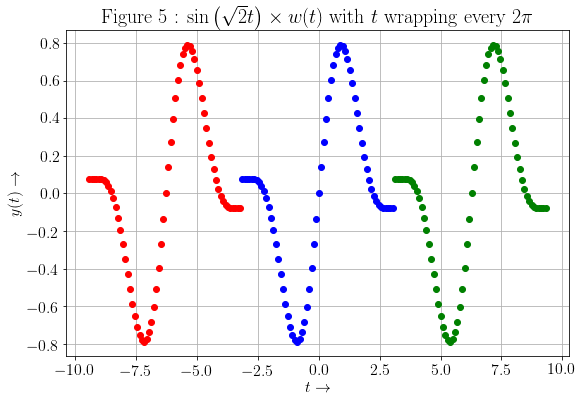

In [11]:
%%writefile_run ee16b031_assignment10.py -a

t1=linspace(-pi,pi,65)[:-1]
t2=linspace(-3*pi,-pi,65)[:-1]
t3=linspace(pi,3*pi,65)[:-1]
n=arange(64)
wnd=fftshift(window_fn(n,64))
y=f(t1,1)*wnd

figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'go',lw=2)
ylabel(r"$y(t) \to$",size=16)
xlabel(r"$t \to$",size=16)
plt_title = r"Figure 5 : $\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$"
title(plt_title)
grid(True)
savefig("fig10-5.png")
show()

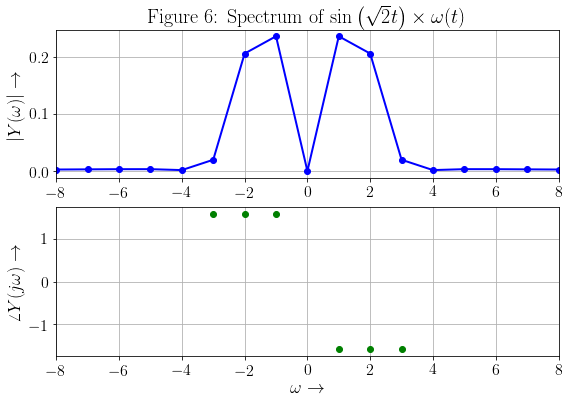

In [12]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-pi,pi,64,1,True)
Xlims = [-8,8]
title_plot = r"Figure 6: Spectrum of $\sin\left(\sqrt{2}t\right)\times \omega(t)$"
plot_FFT(t,Y,w,Xlims,title_plot,"6",True)

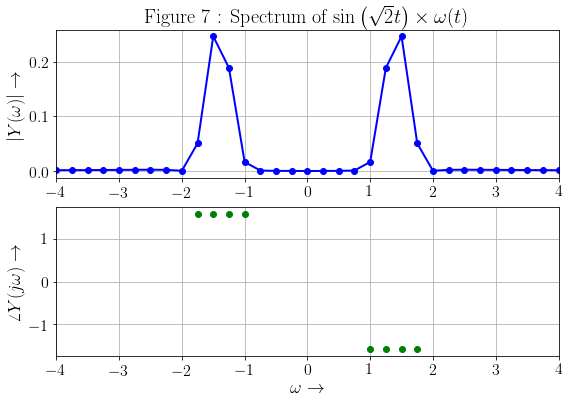

In [13]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-4*pi,4*pi,256,1,True)
Xlims = [-4,4]
plot_title = r"Figure 7 : Spectrum of $\sin\left(\sqrt{2}t\right)\times \omega(t)$"
plot_FFT(t,Y,w,Xlims,plot_title,"7",True)

* Well it is quite a bit better since we are now zoomed in and see a lot more detail. But why is it not just a single peak? 
* The reason for that is $w(t)$. Multiplication in time is convolution in frequency and vice versa. So by multiplying with $w(t)$, we got rid of the 1= f decay.
* But the delta function is now replaced by the shape of the DFT of w[n].
* That gives us a factor of two broadening over the peak when there is no window, which is why we still see a peak whose width is two samples.

## Question 2:
* Consider the function $\cos^3(\omega_0 t)$. Obtain its spectrum for $\omega_0 = 0.86$ with and without a Hamming window.

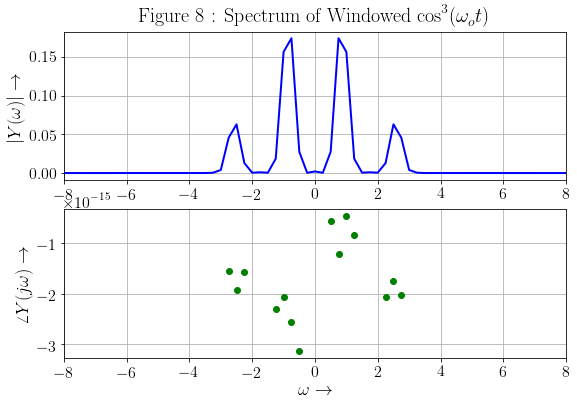

In [14]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-4*pi,4*pi,256,2,True)
Xlims = [-8,8]
plot_title = r"Figure 8 : Spectrum of Windowed $\cos^3(\omega_o t)$"
plot_FFT(t,Y,w,Xlims,plot_title,"8")

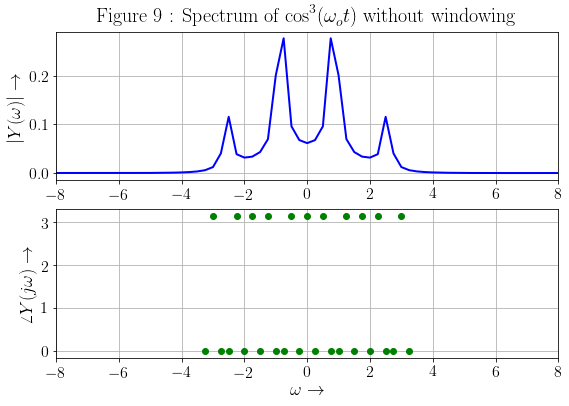

In [15]:
%%writefile_run ee16b031_assignment10.py -a

t,Y,w = findFFT(-4*pi,4*pi,256,2,False)
Xlims = [-8,8]
plot_title = r"Figure 9 : Spectrum of $\cos^3(\omega_o t)$ without windowing"
plot_FFT(t,Y,w,Xlims,plot_title,"9")

### Results and Discussion:
* Here we can see clear differences between the windowed fourier transform and fourier transform without application of windows. Peak is being smeared by the windowing function but the stary high frequency components are attenuated by the window function. The *spectral leakage* can also be noticed.

## Question 3:
* Write a program that will take a 128 element vector known to contain $\cos(\omega_0 t + \delta)$ for arbitrary $\delta$ and $0.5 < \omega_0 < 1.5$ where $\pi \leq t \leq \pi$. 
* You have to extract the digital spectrum of the signal, find the two peaks at $\pm \omega_0$, and estimate $\omega_0$ and $\delta$.

** Estimating $\omega$ and $\delta$ from fourier spectrum**

* According to the question the if the spectra is obtained, the resolution is not enough to obtain the $\omega_0$ directly. The peak will not be visible clearly because of the fact that resolution of the frequecny axis is not enough. So a statistic is necessary to estimate value of $\omega_0$ 

* Let,


\begin{equation}
\mu = Mean(|Y(\omega)|)
\end{equation}

\begin{equation}
\sigma = Standard\ Deviation(|Y(\omega)|)
\end{equation}

\begin{equation}
\omega_0 = \frac{\sum \omega_i |Y(\omega_i)|}{\sum |Y(\omega_i)|} \\
\\
\forall \omega_i\ where\ |Y(\omega_i)| > \mu + 0.1\sigma
\end{equation}


* Which is essentially the weighted average of $\omega$ where weights are $|Y(\omega)|$ subject to constraint that $|Y(j\omega)|$ must be greater than a value as specified in the formula.


* Now, $\delta$ can be found by two ways 
* Least square fitting of


\begin{equation}
y(t) = A\cos(\omega_0 t) + B\sin(\omega_0 t)
\end{equation}

  * Minimizing L2-norm to find the coefficients $A, B$, we can compute $\delta$ by,

\begin{equation}
\delta = -\tan^{-1}(\frac{B}{A})
\end{equation}
* Second approach
   * Find the phase of the discrete fourier transform at $\omega_o$ nearest to estimated $\omega$ using the above statistic.
   * This works because the phase of $\cos(\omega_o t+\delta)$ when $\delta = 0$ is 0, so when its not its $\delta$, so we can estimate it by this approach.
* The latter approach is used in this assignment.

In [16]:
%%writefile_run ee16b031_assignment10.py -a

def estimate_omega(low_lim,up_lim,eps):
    w_actual = np.random.uniform(low_lim,up_lim)
    delta_actual = (randn())
    t,Y,w = findFFT(-1*pi,1*pi,128,5,True,w_actual,delta_actual,eps=eps)
    
    Y_half = Y[int(len(Y)/2):]
    w_half = w[int(len(w)/2):]
    k = 0.1
    idx = np.where(abs(Y_half) >= np.mean(abs(Y_half))+k*sqrt(np.var(abs(Y_half))))
    
    w0 = np.matmul(w_half[idx],
                   np.transpose(abs(Y_half[idx])))/(np.sum(abs(Y_half[idx])))
    
    w_peak_idx = (np.abs(w_half-w0)).argmin()
    delta      = angle(Y_half[w_peak_idx])
    
    print("Actual w0 : %g , Actual delta : %g"%(w_actual,delta_actual))
#     Xlims = [-8,8]
#     plot_title = r"Figure 10 : Spectrum of $\cos(\omega_o t + \delta)$"
#     plot_FFT(t,Y,w,Xlims,plot_title,"10") 
    return t,w0,delta,w_actual,delta_actual

In [17]:
%%writefile_run ee16b031_assignment10.py -a

#function to create Matrix for finding the Best fit using lstsq
# with no_of rows, columns by default 2 and vector x as arguments
def createAmatrix(nrow,t,model,wo):
    A = zeros((nrow,2)) # allocate space for A
    A[:,0],A[:,1] = model(t,wo)
    return A

In [18]:
%%writefile_run ee16b031_assignment10.py -a

# function to calculate model A
def modelA(t,wo):
    return (cos(wo*t),sin(wo*t))

In [19]:
%%writefile_run ee16b031_assignment10.py -a

def estimate_delta(t,wo,y):
    M = createAmatrix(len(y),t,modelA,wo)
    c = (lstsq(M,y)[0])
    #calculating delta
    delta = arccos(c[0]/sqrt(pow(c[0],2)+pow(c[1],2)))
    return delta

In [20]:
%%writefile_run ee16b031_assignment10.py -a

def estimator(N,eps):
    est_err_w = []
    est_err_delta = []
    for i in range(N):
        t,wo_est,delta_est,w_actual,delta_actual = estimate_omega(0.5,1.5,eps)
#         actual_fn = cos(w_actual*t+delta_actual)
#         est_fn    = cos(wo_est*t+delta_est)
        est_err_w.append(abs(amax(w_actual-wo_est)))
        est_err_delta.append(abs(amax(delta_actual-delta_est)))
        
        print("Estimated w0 : %g and delta : %g \n"%((wo_est),delta_est))
    return np.mean(est_err_w),np.mean(est_err_delta)

In [21]:
%%writefile_run ee16b031_assignment10.py -a

eps = 0
N = 5
estimated_error_w,estimated_error_delta = estimator(N,eps)
print("\nEstimated Error for %g sample signals without Noise addition in w0 and delta : %g , %g"%
      (N,estimated_error_w,estimated_error_delta))

Actual w0 : 0.76422 , Actual delta : 0.00809866
Estimated w0 : 0.60583 and delta : 0.00760234 

Actual w0 : 0.8045 , Actual delta : -0.324797
Estimated w0 : 0.653676 and delta : -0.311079 

Actual w0 : 0.787655 , Actual delta : 1.45152
Estimated w0 : 1.09362 and delta : 1.4451 

Actual w0 : 0.974214 , Actual delta : 1.80678
Estimated w0 : 1.12176 and delta : 1.80713 

Actual w0 : 0.915156 , Actual delta : 2.52514
Estimated w0 : 0.794433 and delta : 2.53119 


Estimated Error for 5 sample signals without Noise addition in w0 and delta : 0.17669 , 0.00540536


### Results and Discussion:
* As we observe that actual $\omega$ & $\delta$ are generated using uniformly distributed random functions, and using the above center of mass statistic we get estimated ones close with error in order of 1%

## Question 4:
* Now we add **white gaussian noise** to data in $Q_3$. This can be generated by $randn()$ in python. The extent of this noise is $0.1$ in amplitude (i.e., $0.1*randn(N)$, where $N$ is the number of samples). 
* Repeat the problem and find the $\omega_0$ and $\delta$

In [22]:
%%writefile_run ee16b031_assignment10.py -a

eps = 0.1
N   = 5
estimated_error_w,estimated_error_delta = estimator(N,eps)
print("\nEstimated Error for %g sample signals with Noise addition in w0 and delta : %g , %g"%
      (N,estimated_error_w,estimated_error_delta))

Actual w0 : 0.593301 , Actual delta : -0.266225
Estimated w0 : 0.499905 and delta : 0 

Actual w0 : 0.548121 , Actual delta : 1.55857
Estimated w0 : 1.8753 and delta : 1.33306 

Actual w0 : 1.193 , Actual delta : 1.13629
Estimated w0 : 1.19393 and delta : 1.15778 

Actual w0 : 0.981655 , Actual delta : 0.454583
Estimated w0 : 0.843122 and delta : 0.452327 

Actual w0 : 0.923021 , Actual delta : 0.165297
Estimated w0 : 0.737823 and delta : 0.155109 


Estimated Error for 5 sample signals with Noise addition in w0 and delta : 0.349047 , 0.105134


### Results and Discussion:
* Now we add noise to the function and try to estimate the $\omega$ & $\delta$ from the spectrum.
* We follow same procedure as above case and we can observe that $\omega$ & $\delta$ are generated using uniformly distributed random functions, and using the above center of mass statistic we get estimated ones close with error in order of 10% in $\omega$ and 1% in $\delta$
* This error is slightly higher compared to the case without noise as we expected.

## Question 5 - Analysis of Chirped Signal Spectrum
* Plot the $DFT$ of the function $\cos(16 \ (1.5 + \frac{t}{2\pi}) \ t)$ where $-\pi \leq t \leq \pi$ in $1024$ steps. This is known as a $chirped$ signal.
* Its frequency continuously changes from $16$ to $32$ radians per second. This also means that the period is $64$ samples near $−\pi$ and is $32$ samples near $+\pi$.

In [23]:
%%writefile_run ee16b031_assignment10.py -a

def chirp(t):
    return cos(16*(1.5+t/(2*pi))*t)

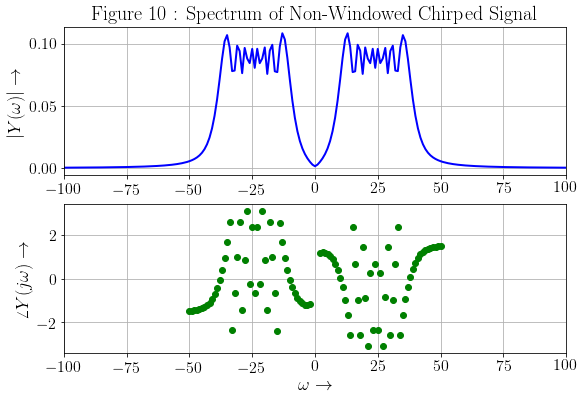

In [24]:
%%writefile_run ee16b031_assignment10.py -a

t = linspace(-pi,pi,1025)[:-1]
dt=t[1]-t[0]
fmax=1/dt
N = 1024
y = chirp(t)
Y=fftshift(fft(y))/N
w = linspace(-pi*fmax,pi*fmax,N+1)[:-1]       
Xlims = [-100,100]
plot_title = r"Figure 10 : Spectrum of Non-Windowed Chirped Signal"
plot_FFT(t,Y,w,Xlims,plot_title,"10")

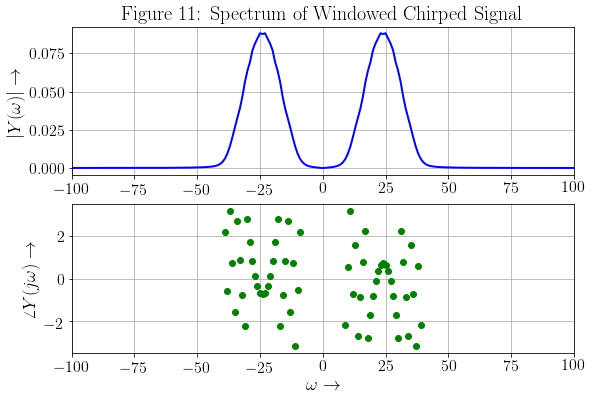

In [25]:
%%writefile_run ee16b031_assignment10.py -a

t = linspace(-pi,pi,1025)[:-1]
dt=t[1]-t[0]
fmax=1/dt
N = 1024
y = chirp(t)

n1=arange(N)
wnd=fftshift(window_fn(n1,N))
y=y*wnd
y[0] = 0
y = fftshift(y)
Y = fftshift(fft(y))/1024.0
w = linspace(-pi*fmax,pi*fmax,1025)[:-1]       

Xlims = [-100,100]
plot_title = r"Figure 11: Spectrum of Windowed Chirped Signal"
plot_FFT(t,Y,w,Xlims,plot_title,"11")

## Question 6:
* For the same chirped signal, break the $1024$ vector into pieces that are $64$ samples wide. Extract the $DFT$ of each and store as a column in a 2D array.
* Then plot the array as a surface plot to show how the frequency of the signal varies with time.
* Plot and analyse the  **time frequency** plot, where we get localized $DFTs$ and show how the spectrum evolves in time.

In [26]:
%%writefile_run ee16b031_assignment10.py -a

def partition(t,n):
    t_batches = [t[i:n+i] for i in range(len(t)-n)]
    return t_batches

In [27]:
%%writefile_run ee16b031_assignment10.py -a

def STFT(t,no_samples,n):
    dt=t[1]-t[0]
#     print(dt)
    fmax=1/dt
    N = no_samples
    y = f(t,n)
    
    n1=arange(N)
    wnd=fftshift(window_fn(n1,N))
    y=y*wnd
        
    Y=fftshift(fft(y))/N
    
    w = linspace(-pi*fmax,pi*fmax,N+1)[:-1]        
    return t,Y,w

* From the 1024 dimensional vector, we take 64 dimensional sub-vector, and find the fourier transform and we will see how it evolves in time.This is known as **Short time Fourier Transform** (STFT)

In [28]:
%%writefile_run ee16b031_assignment10.py -a

n = 64
t_batches = partition(t,n)

batch_dfts = []
batch_ts   = []

for i in range(len(t_batches)):
    t,Y,w = STFT(t_batches[i],n,3)
    batch_dfts.append(Y)
    batch_ts.append(t)

In [29]:
%%writefile_run ee16b031_assignment10.py -a

t = linspace(-pi,pi,1025)[:-1]
T, W = np.meshgrid(t[:960],w)
Z = abs(np.array(batch_dfts))

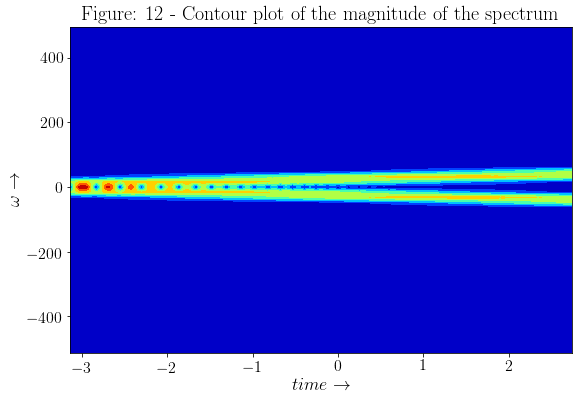

In [38]:
%%writefile_run ee16b031_assignment10.py -a

fig = figure()
ax = fig.add_subplot(111)
ax.contourf(T,W,Z.T,cmap='jet')
title("Figure: 12 - Contour plot of the magnitude of the spectrum")
xlabel(r"$time \to$")
ylabel(r"$\omega \to$")
savefig("fig10-12.png")
show()


### Results and Discussion:
* We observe that the magnitude of the fourier transform splits as time progresses as the frequency of the signal increases.

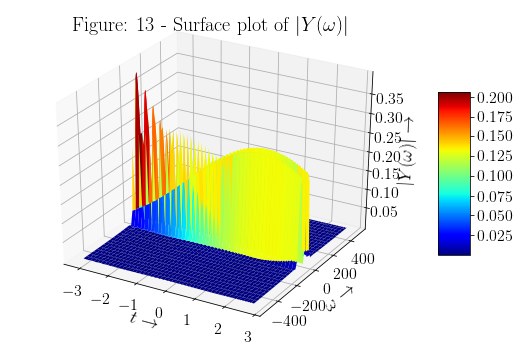

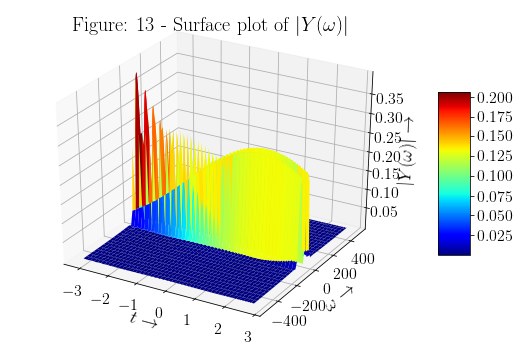

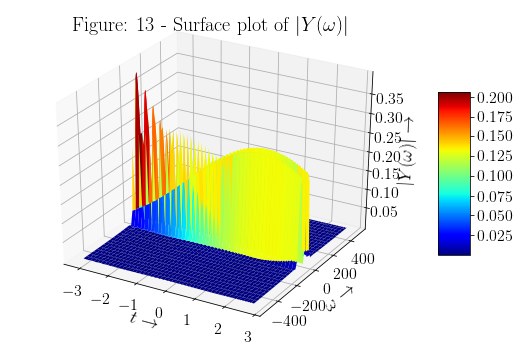

In [36]:
%%writefile_run ee16b031_assignment10.py -a

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(T,W,(Z.T), cmap=cm.jet,
                       linewidth=0.1)

title(r"Figure: 13 - Surface plot of $|Y(\omega)|$")
ax.set_xlabel(r'$t \to$')
ax.set_ylabel(r'$\omega \to$')
ax.set_zlabel(r'$|Y(\omega)| \to$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("fig10-13.png")
plt.show()


### Results & Discussion:
* This is the 3-d surface plot of the magnitude of fourier transform plotted $vs$ time and frequency.
* Here we observe strong peaks and as inferred from the contour plot of the magnitude spectrum we see 2 lobes whose separation increases as time increases.

## Conclusion :
*  Here in this assignment we implemented windowed fourier transform and also understood the need for windowing and also effects of windowing.
* Moreover,we implemented **Short time Fourier Transform** and witnessed how fourier transform evolves in time.